<a href="https://colab.research.google.com/github/aorysan/machineLearning/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [17]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukanz

print("Inspeksi Profile Data")
df.info()
print("Variable bernilai null")
df.isnull().sum()

Inspeksi Profile Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Variable bernilai null


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [28]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

for column in df.select_dtypes(include=['object']).columns:
  if df[column].isnull().sum() > 0:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [46]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

kualitatif = 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'

for col in kualitatif:
  print(f"Tipe data untuk {col} : {df[col].dtype}")
  print(f"Nilai untuk {col} : {df[col].unique()}")

df['income'] = df['income'].str.replace('.', '', regex=False)

print(f"\nNilai unik untuk income setelah dibersihkan: {df['income'].unique()}")

cols_to_replace = ['workclass', 'occupation', 'native-country']
for col in cols_to_replace:
    df[col] = df[col].replace('?', 'Others')

print("\nUnique values after replacing '?':")
for col in cols_to_replace:
    print(f"Nilai unik untuk {col}: {df[col].unique()}")

Tipe data untuk workclass : object
Nilai untuk workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']
Tipe data untuk education : object
Nilai untuk education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Tipe data untuk marital-status : object
Nilai untuk marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Tipe data untuk occupation : object
Nilai untuk occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Tipe data untuk relationship : object
Nilai untuk relationship : ['Not-in-family' 'Husband' 'Wi

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

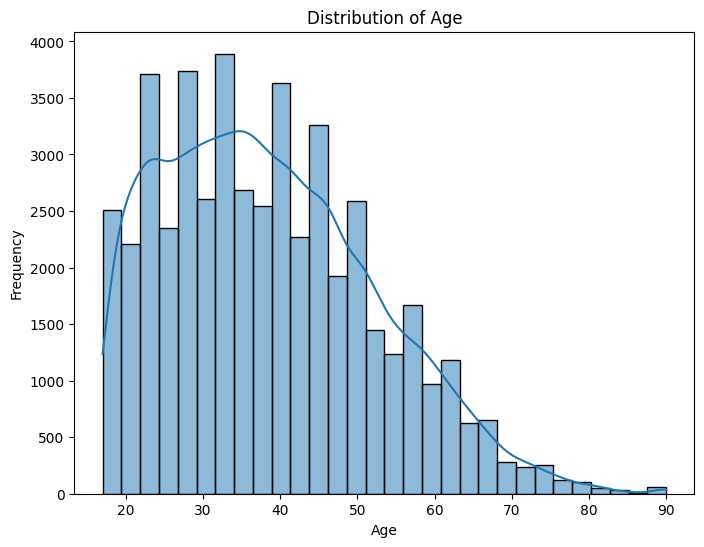

In [47]:
# Jawab 1.1 - Histrogram

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

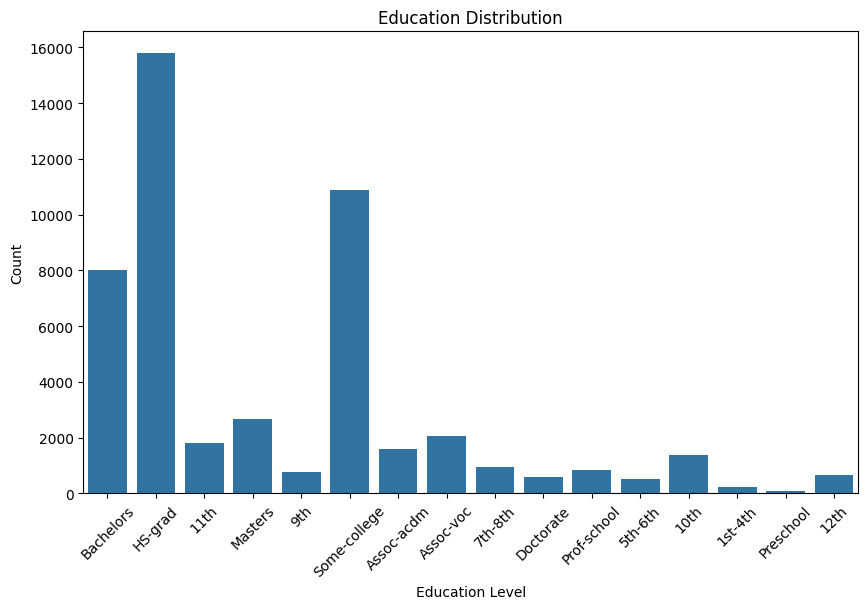

In [48]:
# Jawab 1.2 - Barchart

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

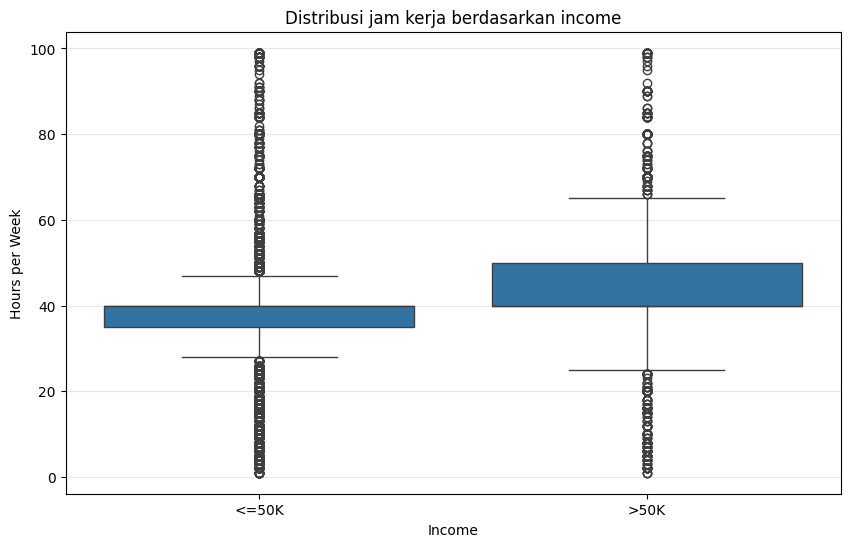

In [51]:
# Jawab 1.3 - Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Distribusi jam kerja berdasarkan income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.grid(axis='y', alpha=0.3)
plt.show()

<Axes: xlabel='age', ylabel='capital-gain'>

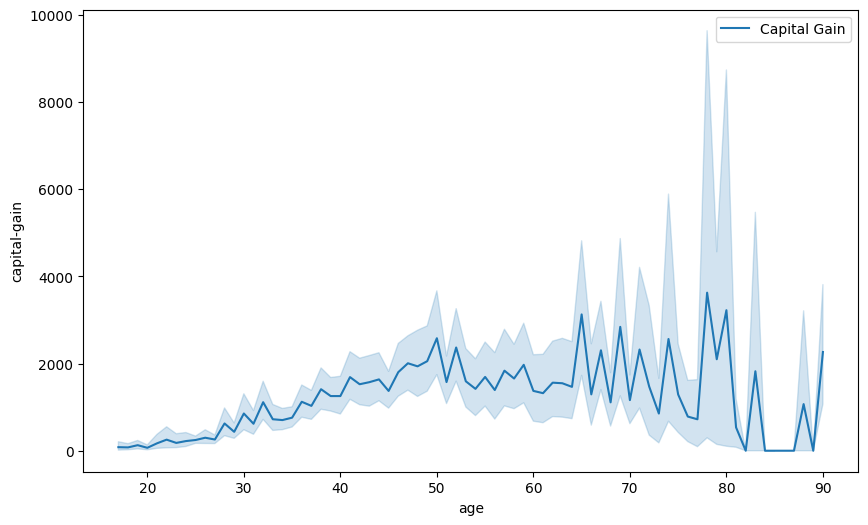

In [52]:
# Jawab 1.4 - Lineplot

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='capital-gain', label='Capital Gain')

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [39]:
# Jawab dengan komentar python

'''
  1. Untuk distribusi age, menunjukkan rata-rata populasi dalam dataset ini berusia lebih muda yang semakin tua, populasinya semakin sedikit.

  2. Jika terdapat data yang hilang, metode yang akan Saya gunakan adalah KNN-imputation karena mungkin saja bisa lebih akurat jika ada pola dalam data yang hilang.

  3.  <=50k : 2000 < x < 3000
      <=50k : 500 < x < 1000

  Jumlah outlier yang ada pada 'income' yang berkaitan dengan 'hours-per-week' adalah yang paling banyak pada kategori '<=50K'.
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [53]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

print("Hasil encoding 'sex' : \n", df['sex'].value_counts())
print("\nHasil encoding 'income' : \n", df['income'].value_counts())

Hasil encoding 'sex' : 
 sex
1    32650
0    16192
Name: count, dtype: int64

Hasil encoding 'income' : 
 income
0    37155
1    11687
Name: count, dtype: int64


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

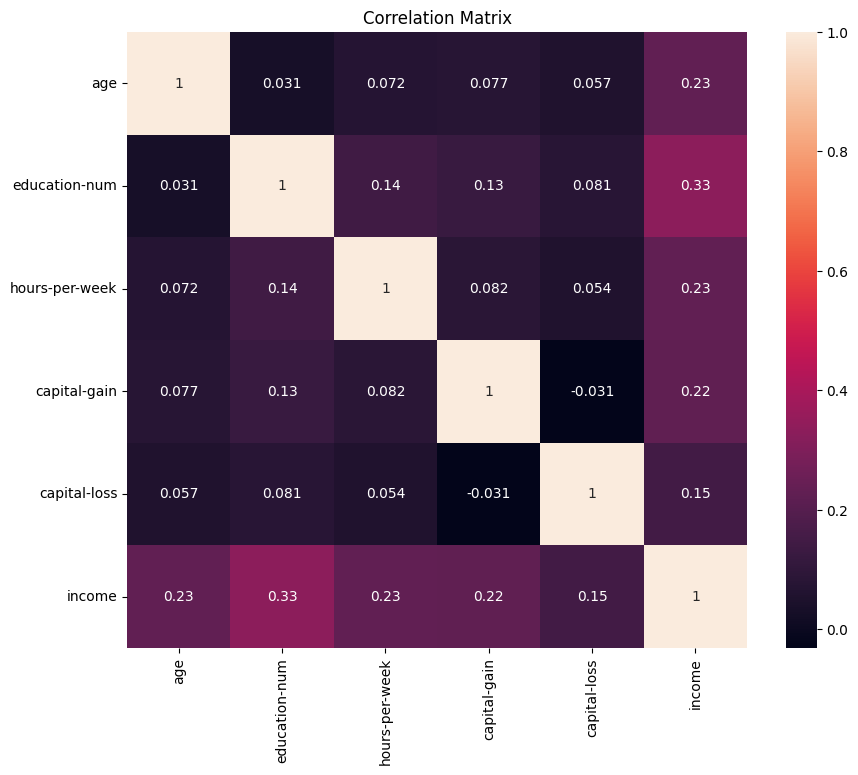

In [60]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

corr_columns = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
cor_df = df[corr_columns]

matrix = cor_df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini

'''
  - Korelasi antara income dengan  fitur :
    1. education-num memiliki korelasi positif dengan income yang menunjukkan besarnya kemungkinan seseorang memiliki pendapatan >50k
    2. hours-per-week memiliki korelasi positif dengan income yang menunjukkan semakin lama orang bekerja , semakin besar pula pendapatannya.
    3. capital-gain memiliki korelasi cukup kuat dengan income mengingat keuntungan modal besar yang sering dikaitkan pendapatan tinggi
    4. capital-loss memiliki korelasi lemah dengan income karena hubungan yang kurang signifikan karena jarang terjadi
    5. age memiliki korelasi lemah dengan income karena hubungan yang sedikit
  - Korelasi antar fitur
    1. education-num dan hours-per-week memiliki korelasi lemah karena hubungan yang sedikit
    2. capital-gain dan capital-loss memiliki korelasi lemah karena hubungan yang sedikit
    3. age dan capital-gain memiliki korelasi lemah karena hubungan yang sedikit
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [62]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


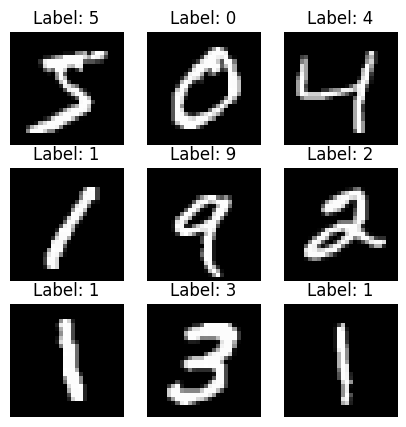

In [69]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

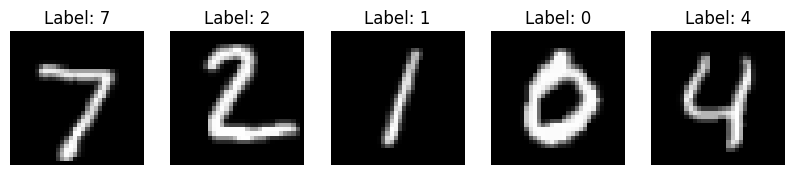

Shape of upsampled data :  (10000, 32, 32)


In [77]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

x = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

for i in range(X_test.shape[0]):
  x[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(10, 2))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(x[i], cmap='gray')
  plt.title(f"Label: {y_test[i]}")
  plt.axis('off')
plt.show()

print("Shape of upsampled data : ", x.shape)

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

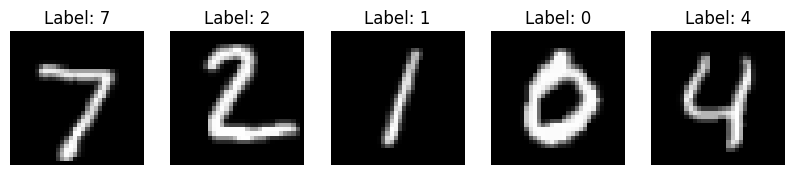

Min of normalized data :  0.0
Max of normalized data :  1.0


In [78]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

x_normal = x.astype('float32') / 255.0

plt.figure(figsize=(10, 2))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(x[i], cmap='gray')
  plt.title(f"Label: {y_test[i]}")
  plt.axis('off')
plt.show()

print("Min of normalized data : ", x_normal.min())
print("Max of normalized data : ", x_normal.max())

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [81]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

x_flat = np.zeros((x_normal.shape[0], 32*32), dtype = np.float32)

for i in range(x_normal.shape[0]):
  x_flat[i] = x_normal[i].reshape(-1)

print("Shape of flattened data : ", x_flat.shape)
print("Min value in flattened data : ", x_flat.min())
print("Max value in flattened data : ", x_flat.max())

print("First 10 elements of first flattened : ", x_flat[0, :10])

Shape of flattened data :  (10000, 1024)
Min value in flattened data :  0.0
Max value in flattened data :  1.0
First 10 elements of first flattened :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
